In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Preprocessing input data
data = pd.read_csv('Dataset.csv')
x= data.iloc[:,0]
y = data.iloc[:,1]

In [3]:
#Min- Max Normalization
x = ((x - x.min())/ (x.max() - x.min()))
y = ((y - y.min())/ (y.max() - y.min()))

In [4]:
#Polynomial regression with least squares method
x = np.array(x)
y = np.array(y)
n=2
A = np.zeros((n+1, n+1))
b = np.zeros((n+1, 1))

for i in range(n+1):
    print('row',i)
    for j in range(n+1):
        print('column', j)
        print('element', f'sum(x**{i+j})')
        A[i,j] = sum(x**(i+j))
    print('b element', f'sum(x**{i}*y)')
    b[i] = sum(x**(i)*y)

print('A',A)
print('b', b)
c = np.dot(np.linalg.inv(A),b)
c = np.flip(c)
c = c.ravel()
print('c', c)

f = np.poly1d(c)
print(f)

row 0
column 0
element sum(x**0)
column 1
element sum(x**1)
column 2
element sum(x**2)
b element sum(x**0*y)
row 1
column 0
element sum(x**1)
column 1
element sum(x**2)
column 2
element sum(x**3)
b element sum(x**1*y)
row 2
column 0
element sum(x**2)
column 1
element sum(x**3)
column 2
element sum(x**4)
b element sum(x**2*y)
A [[20.         10.8954386   7.81364752]
 [10.8954386   7.81364752  6.06826835]
 [ 7.81364752  6.06826835  4.94390236]]
b [[8.50670191]
 [2.70464175]
 [1.48132453]]
c [ 0.13317542 -1.15585519  1.00298327]
        2
0.1332 x - 1.156 x + 1.003


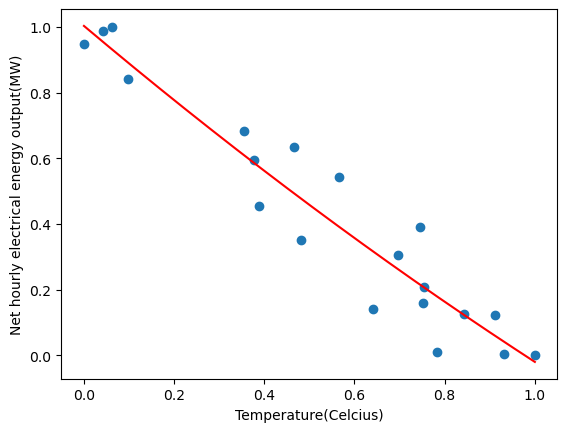

In [5]:
#Making Predictions
y_pred = (c[0]*x**2) + (c[1]*x) + c[2]
p = np.poly1d(np.polyfit(x,y_pred,2))
t = np.linspace(0,1,250)
plt.plot(x,y,'o',t,p(t),'r-')
plt.xlabel("Temperature(Celcius)")
plt.ylabel("Net hourly electrical energy output(MW)")
plt.show()

In [6]:
#Gradient descent for polynomial regression
a0 = 0.3
a1 = 1
a2 = 1
n = len(x)
learning_rate = 0.07
iterations = 30000


for i in range(iterations):
    y_pred = (a2*x**2) + (a1*x) + a0
    cost = (1/4*n)* sum([val**4 for val in (y-y_pred)])
    da2 = -(1/n)*sum((x**2)*(y-y_pred)**3)
    da1 = -(1/n)*sum((x)*(y-y_pred)**3)
    da0 = -(1/n)*sum((y-y_pred)**3)
    a2 = a2 - learning_rate * da2
    a1 = a1 - learning_rate * da1
    a0 = a0 - learning_rate * da0
    print("a2 {}, a1 {}, a0 {}, cost {}, iterations {}".format(a2, a1, a0, cost, i))

a2 0.9035420632880975, a1 0.892422801860039, a0 -0.015196163090096929, cost 303.96512777162434, iterations 0
a2 0.8481386854208139, a1 0.8314740899806706, a0 -0.07322896196332473, cost 156.01155178958243, iterations 1
a2 0.8090305737857193, a1 0.7889517767889161, a0 -0.10802569146360104, cost 108.00137649083766, iterations 2
a2 0.7787195709091627, a1 0.7563566237509051, a0 -0.1300474200876485, cost 85.56287501370508, iterations 3
a2 0.7538736070515398, a1 0.7299194385959492, a0 -0.14406253245523026, cost 73.05352567762911, iterations 4
a2 0.7327224185789857, a1 0.7076387143624914, a0 -0.1526764420220848, cost 65.21568690473114, iterations 5
a2 0.7142178522666781, a1 0.688328889587478, a0 -0.15747497845197533, cost 59.84779741108046, iterations 6
a2 0.6976917090803746, a1 0.6712335021859518, a0 -0.15949478316288399, cost 55.89695125874529, iterations 7
a2 0.6826943747214699, a1 0.6558430296059676, a0 -0.15944829205921096, cost 52.81213033371985, iterations 8
a2 0.6689105398015174, a1 0.

a2 -0.3492184096550523, a1 -0.40275139295862017, a0 0.7711623913078882, cost 0.0768107532751723, iterations 2358
a2 -0.34926390262492274, a1 -0.4028083717483183, a0 0.771201541547665, cost 0.07677158521007549, iterations 2359
a2 -0.3493093707883699, a1 -0.40286532154931576, a0 0.7712406696341889, cost 0.07673245886634536, iterations 2360
a2 -0.3493548141683071, a1 -0.40292224238680363, a0 0.7712797755915018, cost 0.07669337418261324, iterations 2361
a2 -0.3494002327876124, a1 -0.4029791342859367, a0 0.7713188594436092, cost 0.07665433109763156, iterations 2362
a2 -0.3494456266691284, a1 -0.4030359972718336, a0 0.7713579212144801, cost 0.07661532955027377, iterations 2363
a2 -0.3494909958356624, a1 -0.4030928313695769, a0 0.7713969609280469, cost 0.07657636947953368, iterations 2364
a2 -0.34953634030998676, a1 -0.40314963660421316, a0 0.771435978608206, cost 0.07653745082452568, iterations 2365
a2 -0.3495816601148385, a1 -0.403206413000753, a0 0.7714749742788175, cost 0.0764985735244839

a2 -0.41172749990762025, a1 -0.48380315727912093, a0 0.8268453997078589, cost 0.039271286880105394, iterations 4569
a2 -0.4117443213310262, a1 -0.4838264797041685, a0 0.826862166756292, cost 0.03926495192246458, iterations 4570
a2 -0.4117611355850268, a1 -0.48384979409240025, a0 0.8268789288146091, cost 0.03925862144330473, iterations 4571
a2 -0.4117779426725067, a1 -0.4838731004475049, a0 0.8268956858846949, cost 0.03925229543911582, iterations 4572
a2 -0.4117947425963491, a1 -0.48389639877316915, a0 0.8269124379684323, cost 0.03924597390639096, iterations 4573
a2 -0.41181153535943554, a1 -0.48391968907307764, a0 0.8269291850677031, cost 0.03923965684162641, iterations 4574
a2 -0.41182832096464644, a1 -0.4839429713509133, a0 0.8269459271843876, cost 0.03923334424132146, iterations 4575
a2 -0.41184509941486064, a1 -0.48396624561035695, a0 0.8269626643203649, cost 0.03922703610197851, iterations 4576
a2 -0.41186187071295566, a1 -0.4839895118550875, a0 0.8269793964775124, cost 0.03922073

a2 -0.43773091317408436, a1 -0.5253673927156431, a0 0.8575835607745732, cost 0.03147330213852208, iterations 7175
a2 -0.4377359538112941, a1 -0.5253782417467042, a0 0.8575915447699288, cost 0.03147211960426866, iterations 7176
a2 -0.43774099177427755, a1 -0.525389088132706, a0 0.8575995265518234, cost 0.03147093775423504, iterations 7177
a2 -0.43774602706399646, a1 -0.5253999318746881, a0 0.8576075061209195, cost 0.031469756587958635, iterations 7178
a2 -0.43775105968141215, a1 -0.5254107729736897, a0 0.8576154834778795, cost 0.0314685761049773, iterations 7179
a2 -0.4377560896274856, a1 -0.5254216114307492, a0 0.8576234586233656, cost 0.03146739630482917, iterations 7180
a2 -0.43776111690317737, a1 -0.5254324472469049, a0 0.8576314315580398, cost 0.031466217187052656, iterations 7181
a2 -0.4377661415094477, a1 -0.5254432804231942, a0 0.8576394022825637, cost 0.031465038751186614, iterations 7182
a2 -0.4377711634472564, a1 -0.5254541109606545, a0 0.8576473707975991, cost 0.031463860996

a2 -0.4438393452947315, a1 -0.5450392383400645, a0 0.8712725715913073, cost 0.029905948307076373, iterations 9483
a2 -0.44384015370384144, a1 -0.5450460030715344, a0 0.8712768717444983, cost 0.02990557729802449, iterations 9484
a2 -0.4438409609087139, a1 -0.5450527666642797, a0 0.8712811707929339, cost 0.029905206442476337, iterations 9485
a2 -0.44384176690975086, a1 -0.5450595291186877, a0 0.8712854687369462, cost 0.02990483574033652, iterations 9486
a2 -0.44384257170735436, a1 -0.5450662904351453, a0 0.8712897655768677, cost 0.029904465191509785, iterations 9487
a2 -0.44384337530192614, a1 -0.5450730506140394, a0 0.8712940613130302, cost 0.02990409479590093, iterations 9488
a2 -0.4438441776938678, a1 -0.5450798096557568, a0 0.8712983559457659, cost 0.029903724553414796, iterations 9489
a2 -0.4438449788835809, a1 -0.5450865675606839, a0 0.8713026494754065, cost 0.029903354463956307, iterations 9490
a2 -0.44384577887146676, a1 -0.5450933243292072, a0 0.8713069419022837, cost 0.02990298

a2 -0.44306840801942127, a1 -0.5587288756159434, a0 0.879062102868274, cost 0.02930179649625215, iterations 11886
a2 -0.4430672164832309, a1 -0.5587337447900194, a0 0.8790645092789666, cost 0.029301619786221693, iterations 11887
a2 -0.44306602439830123, a1 -0.5587386134358765, a0 0.8790669151496656, cost 0.02930144311297428, iterations 11888
a2 -0.4430648317648095, a1 -0.5587434815536739, a0 0.8790693204805299, cost 0.0293012664764892, iterations 11889
a2 -0.44306363858293274, a1 -0.5587483491435707, a0 0.8790717252717184, cost 0.02930108987674571, iterations 11890
a2 -0.443062444852848, a1 -0.5587532162057259, a0 0.87907412952339, cost 0.029300913313722962, iterations 11891
a2 -0.4430612505747323, a1 -0.5587580827402986, a0 0.8790765332357036, cost 0.02930073678740029, iterations 11892
a2 -0.44306005574876245, a1 -0.5587629487474476, a0 0.8790789364088177, cost 0.02930056029775693, iterations 11893
a2 -0.4430588603751154, a1 -0.5587678142273318, a0 0.8790813390428913, cost 0.029300383

a2 -0.43886283414333227, a1 -0.5693939317603303, a0 0.883664155870788, cost 0.028942800219944137, iterations 14336
a2 -0.4388607136753729, a1 -0.569397875511045, a0 0.8836656170848802, cost 0.028942673442531548, iterations 14337
a2 -0.43885859295937296, a1 -0.5694018189990604, a0 0.8836670780338954, cost 0.028942546675377295, iterations 14338
a2 -0.4388564719954139, a1 -0.5694057622244469, a0 0.8836685387179094, cost 0.02894241991847662, iterations 14339
a2 -0.43885435078357715, a1 -0.5694097051872755, a0 0.883669999136998, cost 0.028942293171824784, iterations 14340
a2 -0.43885222932394413, a1 -0.5694136478876166, a0 0.883671459291237, cost 0.02894216643541699, iterations 14341
a2 -0.43885010761659615, a1 -0.569417590325541, a0 0.8836729191807023, cost 0.028942039709248454, iterations 14342
a2 -0.4388479856616146, a1 -0.5694215325011192, a0 0.8836743788054697, cost 0.028941912993314417, iterations 14343
a2 -0.4388458634590808, a1 -0.5694254744144217, a0 0.883675838165615, cost 0.02894

a2 -0.43343171820122045, a1 -0.5779430267696152, a0 0.8864699799877632, cost 0.028669515528968525, iterations 16651
a2 -0.4334291980991801, a1 -0.5779465132469753, a0 0.8864709912895606, cost 0.028669403930588262, iterations 16652
a2 -0.4334266778842554, a1 -0.577949999578265, a0 0.8864720024534194, cost 0.02866929233637193, iterations 16653
a2 -0.43342415755648656, a1 -0.5779534857635189, a0 0.8864730134793778, cost 0.028669180746318287, iterations 16654
a2 -0.4334216371159139, a1 -0.5779569718027716, a0 0.8864740243674742, cost 0.02866906916042604, iterations 16655
a2 -0.43341911656257776, a1 -0.5779604576960577, a0 0.886475035117747, cost 0.028668957578693942, iterations 16656
a2 -0.4334165958965183, a1 -0.577963943443412, a0 0.8864760457302342, cost 0.02866884600112074, iterations 16657
a2 -0.43341407511777585, a1 -0.5779674290448688, a0 0.8864770562049742, cost 0.02866873442770511, iterations 16658
a2 -0.4334115542263906, a1 -0.5779709145004628, a0 0.8864780665420053, cost 0.02866

a2 -0.4272716247883574, a1 -0.5857964770118126, a0 0.8885361700691062, cost 0.028416706926139464, iterations 19001
a2 -0.42726892864666866, a1 -0.5857996970008423, a0 0.8885369424854427, cost 0.0284166027292156, iterations 19002
a2 -0.4272662324602123, a1 -0.5858029169024758, a0 0.8885377148290923, cost 0.028416498534770324, iterations 19003
a2 -0.4272635362290083, a1 -0.5858061367167303, a0 0.8885384871000744, cost 0.028416394342803252, iterations 19004
a2 -0.4272608399530768, a1 -0.5858093564436234, a0 0.8885392592984086, cost 0.02841629015331405, iterations 19005
a2 -0.4272581436324378, a1 -0.5858125760831724, a0 0.8885400314241141, cost 0.028416185966302333, iterations 19006
a2 -0.42725544726711134, a1 -0.5858157956353945, a0 0.8885408034772103, cost 0.028416081781767744, iterations 19007
a2 -0.42725275085711745, a1 -0.5858190151003073, a0 0.8885415754577167, cost 0.028415977599709957, iterations 19008
a2 -0.42725005440247615, a1 -0.585822234477928, a0 0.8885423473656526, cost 0.02

a2 -0.4212374929971046, a1 -0.5927231440990333, a0 0.8900951156241688, cost 0.028192070766879847, iterations 21210
a2 -0.4212347377994887, a1 -0.5927262057928379, a0 0.8900957662297397, cost 0.028191971403278226, iterations 21211
a2 -0.4212319825896839, a1 -0.5927292674277924, a0 0.8900964167944156, cost 0.02819187204165615, iterations 21212
a2 -0.42122922736770074, a1 -0.5927323290039063, a0 0.8900970673182068, cost 0.02819177268201349, iterations 21213
a2 -0.42122647213354963, a1 -0.5927353905211887, a0 0.8900977178011236, cost 0.028191673324350148, iterations 21214
a2 -0.42122371688724103, a1 -0.5927384519796491, a0 0.8900983682431763, cost 0.028191573968665916, iterations 21215
a2 -0.4212209616287855, a1 -0.5927415133792968, a0 0.8900990186443755, cost 0.028191474614960712, iterations 21216
a2 -0.42121820635819335, a1 -0.5927445747201412, a0 0.8900996690047311, cost 0.028191375263234394, iterations 21217
a2 -0.42121545107547514, a1 -0.5927476360021915, a0 0.8901003193242538, cost 0

a2 -0.4154690238936702, a1 -0.5990030320638008, a0 0.8913786815023824, cost 0.027988647291072883, iterations 23299
a2 -0.4154662620340797, a1 -0.5990059878107981, a0 0.8913792654065036, cost 0.027988551831150774, iterations 23300
a2 -0.4154635001786397, a1 -0.5990089435138272, a0 0.8913798492860818, cost 0.027988456373008744, iterations 23301
a2 -0.4154607383273558, a1 -0.5990118991728933, a0 0.8913804331411228, cost 0.0279883609166467, iterations 23302
a2 -0.4154579764802337, a1 -0.5990148547880019, a0 0.8913810169716323, cost 0.027988265462064597, iterations 23303
a2 -0.41545521463727897, a1 -0.5990178103591581, a0 0.8913816007776161, cost 0.027988170009262354, iterations 23304
a2 -0.41545245279849735, a1 -0.5990207658863674, a0 0.8913821845590799, cost 0.027988074558239907, iterations 23305
a2 -0.41544969096389445, a1 -0.5990237213696351, a0 0.8913827683160296, cost 0.027987979108997193, iterations 23306
a2 -0.4154469291334759, a1 -0.5990266768089665, a0 0.8913833520484709, cost 0.0

a2 -0.4091867723086479, a1 -0.6056427316251779, a0 0.8926570805502473, cost 0.027775320094919, iterations 25581
a2 -0.4091840317876429, a1 -0.6056455984945888, a0 0.892657620733029, cost 0.027775228544003727, iterations 25582
a2 -0.4091812912801303, a1 -0.6056484653291904, a0 0.892658160901024, cost 0.02777513699474283, iterations 25583
a2 -0.40917855078611304, a1 -0.6056513321289857, a0 0.8926587010542354, cost 0.02777504544713627, iterations 25584
a2 -0.4091758103055939, a1 -0.6056541988939778, a0 0.8926592411926663, cost 0.027774953901184042, iterations 25585
a2 -0.40917306983857576, a1 -0.6056570656241694, a0 0.8926597813163196, cost 0.027774862356886067, iterations 25586
a2 -0.4091703293850614, a1 -0.6056599323195637, a0 0.8926603214251985, cost 0.027774770814242296, iterations 25587
a2 -0.40916758894505373, a1 -0.6056627989801636, a0 0.892660861519306, cost 0.027774679273252688, iterations 25588
a2 -0.4091648485185555, a1 -0.605665665605972, a0 0.8926614015986453, cost 0.02777458

a2 -0.4024728630908751, a1 -0.6126158385419992, a0 0.8939512863168959, cost 0.027554389183733, iterations 28048
a2 -0.40247016263613544, a1 -0.6126186270036261, a0 0.893951797594918, cost 0.02755430158611459, iterations 28049
a2 -0.40246746219975355, a1 -0.6126214154359672, a0 0.8939523088636869, cost 0.027554213990050154, iterations 28050
a2 -0.4024647617817307, a1 -0.6126242038390238, a0 0.8939528201232042, cost 0.027554126395539634, iterations 28051
a2 -0.4024620613820682, a1 -0.6126269922127978, a0 0.8939533313734714, cost 0.02755403880258295, iterations 28052
a2 -0.4024593610007673, a1 -0.6126297805572909, a0 0.8939538426144902, cost 0.027553951211180108, iterations 28053
a2 -0.40245666063782926, a1 -0.6126325688725046, a0 0.8939543538462621, cost 0.02755386362133106, iterations 28054
a2 -0.4024539602932554, a1 -0.6126353571584406, a0 0.8939548650687886, cost 0.027553776033035764, iterations 28055
a2 -0.40245125996704706, a1 -0.6126381454151006, a0 0.8939553762820714, cost 0.02755

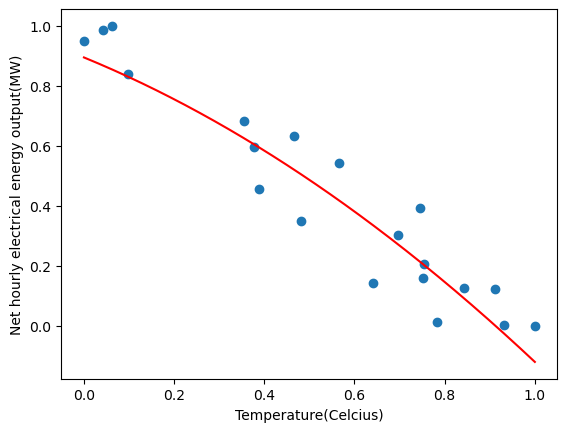

In [8]:
#Making Predictions
y_pred = (a2*x**2) + (a1*x) + a0

p = np.poly1d(np.polyfit(x,y_pred,2))
t = np.linspace(0,1,250)
plt.plot(x,y,'o',t,p(t),'r-')
plt.xlabel("Temperature(Celcius)")
plt.ylabel("Net hourly electrical energy output(MW)")
plt.show()

In [ ]:
!jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10